In [12]:
# Import libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
path ='/Users/apple/Documents/Github/Water_Pump_Classification/Data/'


In [13]:
train_cleaned = pd.read_csv(path+"train_cleaned.csv",index_col='id');
all_data_cleaned = pd.read_csv(path+"all_data_cleaned.csv", index_col='id');

In [11]:
train_cleaned.head()

,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,population,...,label,train_test,date_recorded_new,funder_new,installer_new,wpt_name_new,subvillage_new,lga_new,ward_new,scheme_name_new
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.000000,1390,34.938093,-9.856322,0,Lake Nyasa,Iringa,11,5,109.000000,...,functional,1,2011-03-14,other,other,none,other,other,other,other
8776,317.650385,1399,34.698766,-2.147466,0,Lake Victoria,Mara,20,2,280.000000,...,functional,1,other,other,other,Zahanati,other,other,other,other
34310,25.000000,686,37.460664,-3.821329,0,Pangani,Manyara,21,4,250.000000,...,functional,1,other,other,World vision,other,Majengo,other,other,other
67743,317.650385,263,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,90,63,58.000000,...,non functional,1,other,Unicef,other,other,other,other,other,other
19728,317.650385,0,31.130847,-1.825359,0,Lake Victoria,Kagera,18,1,179.909983,...,functional,1,other,other,other,Shuleni,other,Karagwe,other,other


In [4]:
# Extract numeric and categorical columns
numerical_cols = [cname for cname in train_cleaned.columns if train_cleaned[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in train_cleaned.columns if train_cleaned[cname].dtype == "object" ]

print('numeric columns:', numerical_cols)
print('Categorical columns:', categorical_cols)

numeric columns: ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'train_test']
Categorical columns: ['basin', 'region', 'scheme_management', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'label', 'date_recorded_new', 'funder_new', 'installer_new', 'wpt_name_new', 'subvillage_new', 'lga_new', 'ward_new', 'scheme_name_new']


In [21]:
numerical_cols=numerical_cols[0:-1]

In [22]:
df_num = train_cleaned[numerical_cols]
df_cat = train_cleaned[categorical_cols]

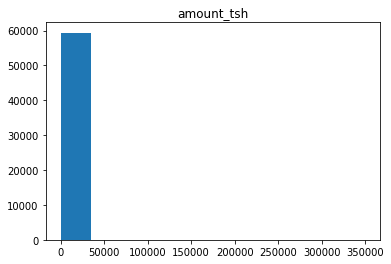

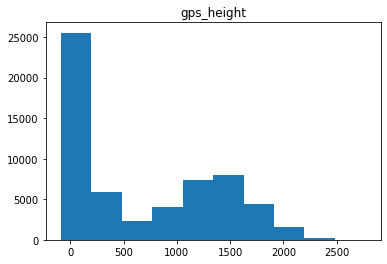

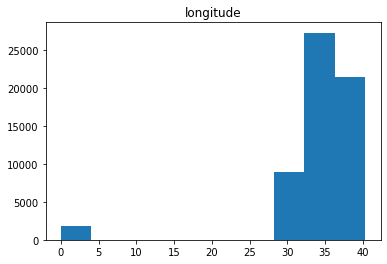

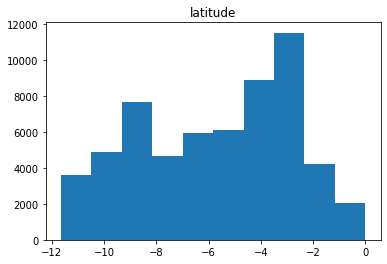

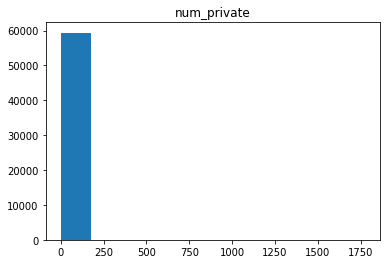

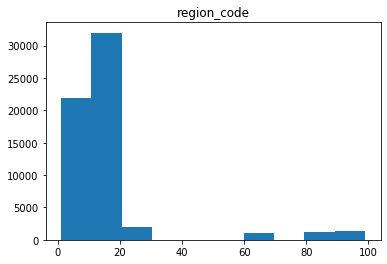

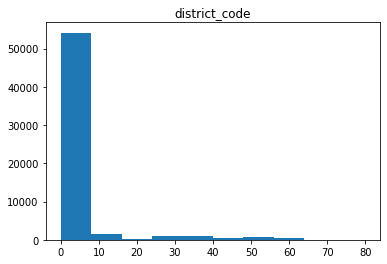

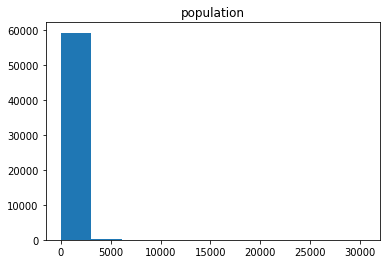

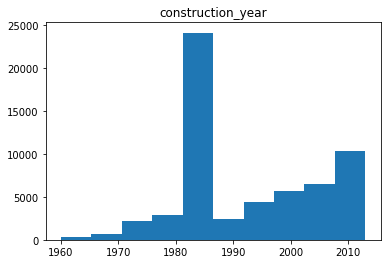

In [23]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show() 

                   amount_tsh  gps_height  longitude  latitude  num_private  \
amount_tsh           1.000000    0.063393   0.013207 -0.041949     0.001945   
gps_height           0.063393    1.000000   0.149155 -0.035751     0.007237   
longitude            0.013207    0.149155   1.000000 -0.425802     0.023873   
latitude            -0.041949   -0.035751  -0.425802  1.000000     0.006837   
num_private          0.001945    0.007237   0.023873  0.006837     1.000000   
region_code         -0.026135   -0.183521   0.034197 -0.221018    -0.020377   
district_code       -0.023385   -0.171233   0.151398 -0.201020    -0.004478   
population           0.003270    0.057440   0.041221  0.001947     0.002663   
construction_year    0.021541    0.296245   0.188632 -0.085974     0.009013   

                   region_code  district_code  population  construction_year  
amount_tsh           -0.026135      -0.023385    0.003270           0.021541  
gps_height           -0.183521      -0.171233    0.

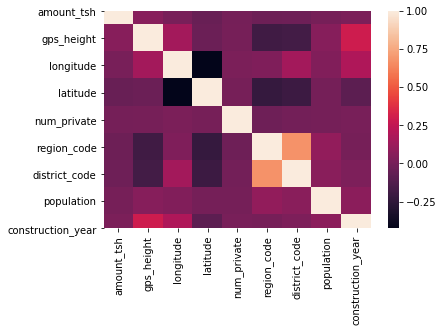

In [24]:
import seaborn as sns
print(df_num.corr())
sns.heatmap(df_num.corr())

In [25]:
# compare label(status) across numeric data
pd.pivot_table(train_cleaned, index = 'label', values = numerical_cols)

,amount_tsh,construction_year,district_code,gps_height,latitude,longitude,num_private,population,region_code
label,,,,,,,,,
functional,655.840780,1995.378003,5.134660,740.131188,-5.704921,34.242071,0.539012,272.417190,13.616417
functional needs repair,491.347318,1991.421357,4.759092,627.607135,-5.162580,31.242086,0.307621,269.056026,15.443595
non functional,386.311037,1990.052839,6.494173,574.464774,-5.810394,34.381006,0.413950,275.835020,17.644585


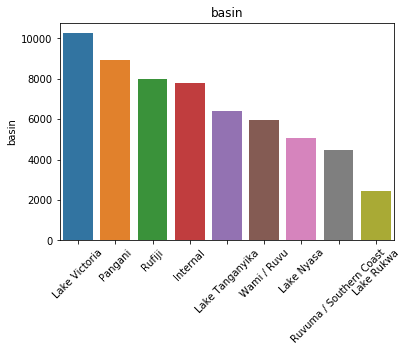

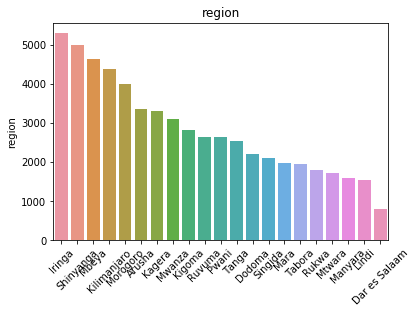

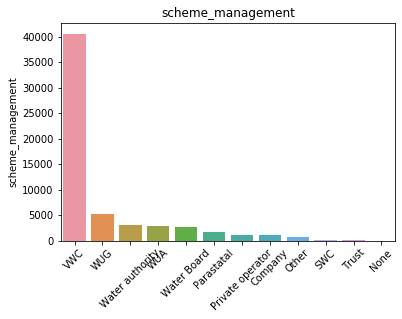

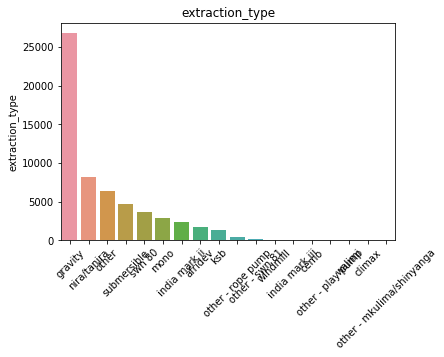

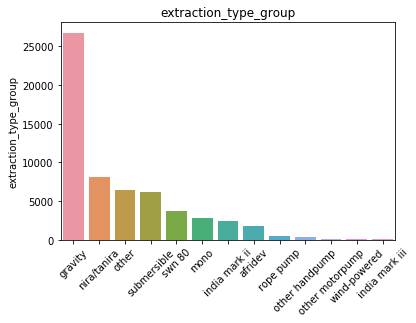

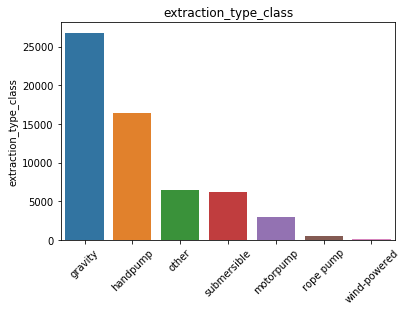

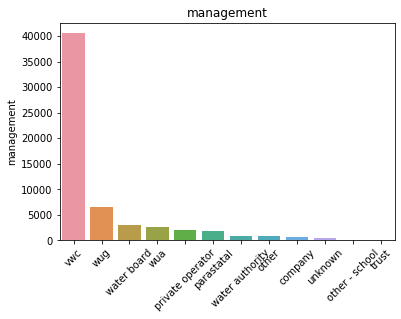

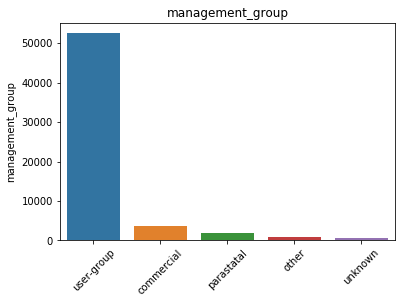

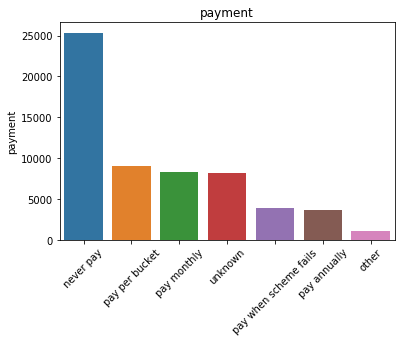

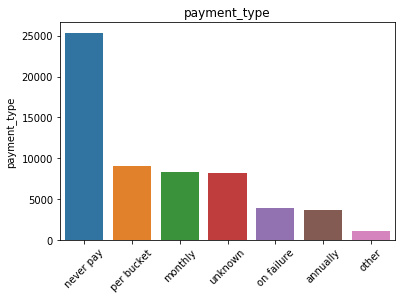

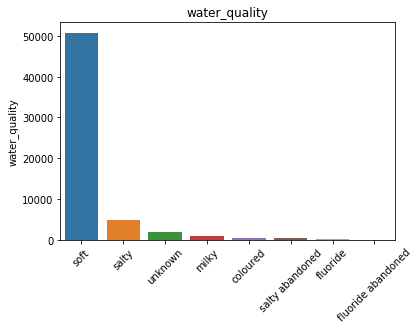

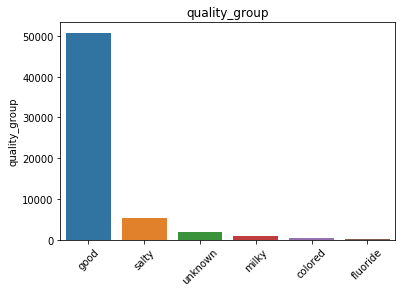

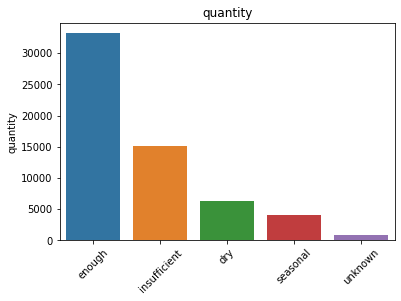

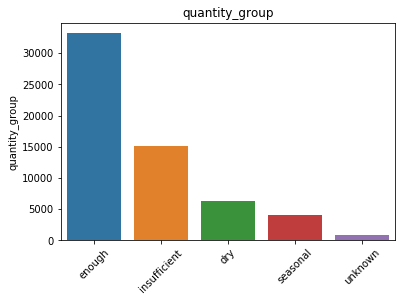

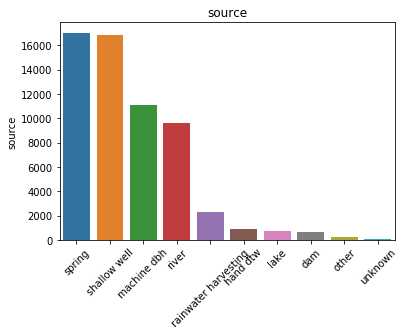

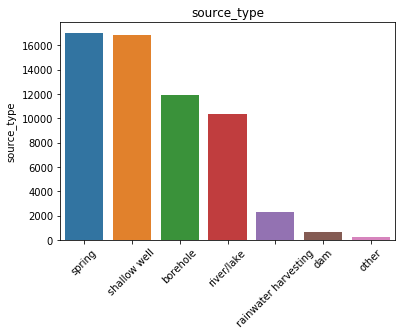

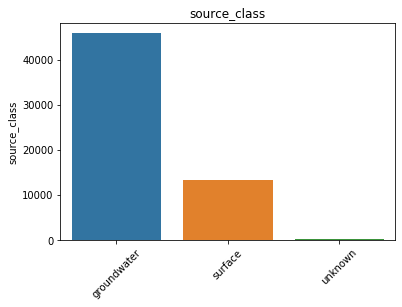

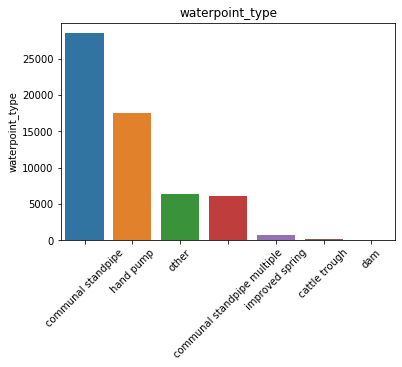

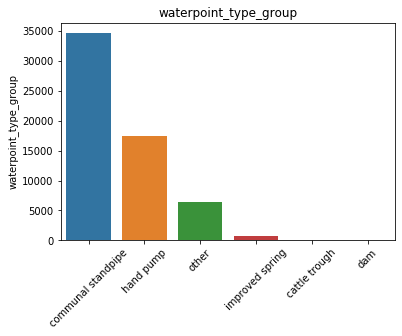

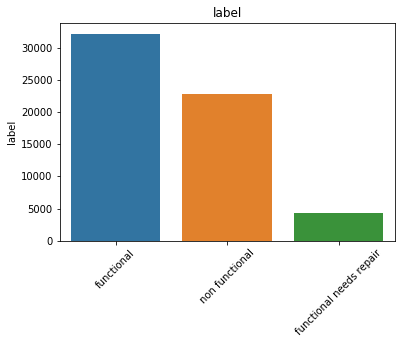

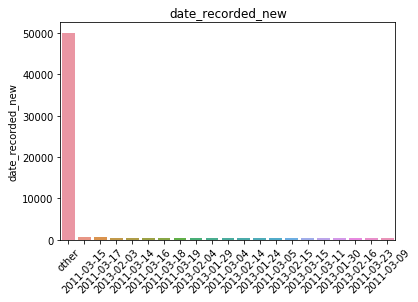

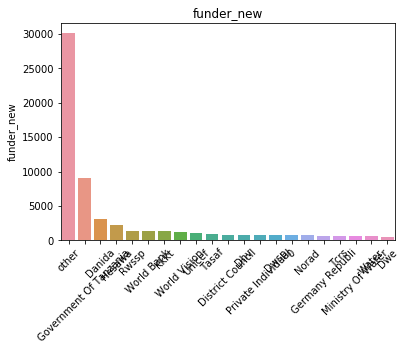

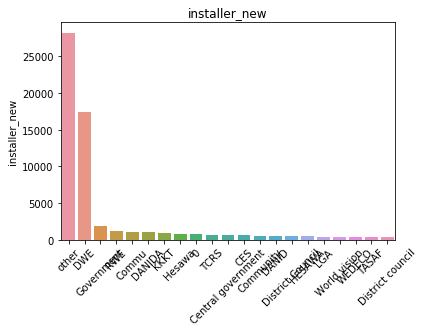

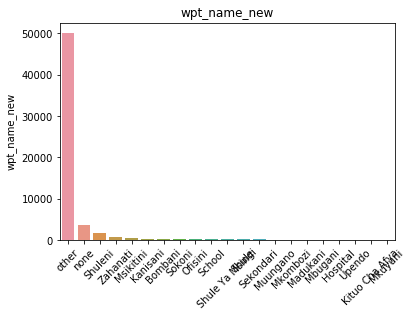

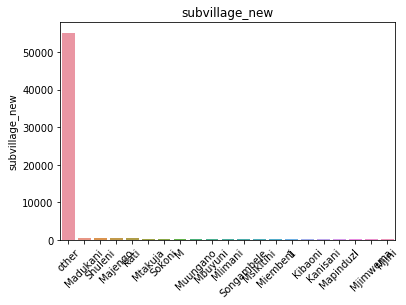

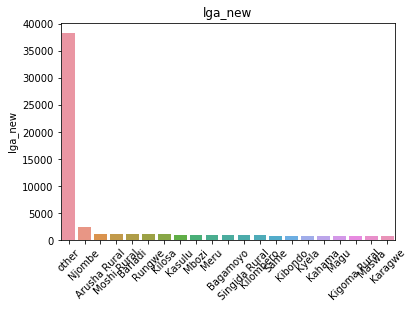

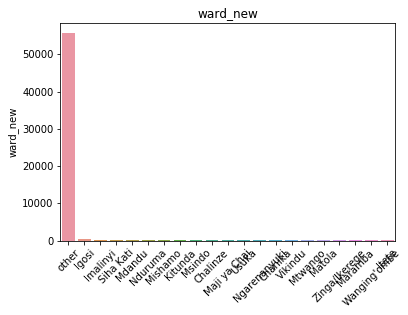

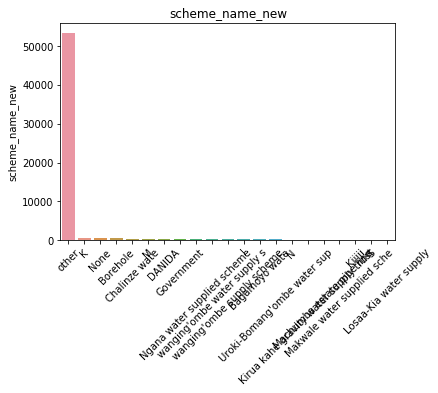

In [27]:
#Categorical data
for i in df_cat.columns:
    chart=sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.xticks(rotation=45)
    plt.show()

payment, quantity, waterpoint_type are duplicate data,  date_recorded_new ( does not say much)

In [28]:
col_drop = ['payment','quantity','waterpoint_type', 'date_recorded_new']

In [29]:
train_cleaned.drop(col_drop, axis=1, inplace=True);
all_data_cleaned.drop(col_drop, axis=1, inplace=True);

In [33]:
# Comparing label( status) and each of these categorical variables 
print(pd.pivot_table(train_cleaned, index = 'label', columns = 'source_class', values = 'quantity_group' ,aggfunc ='count'))
print(pd.pivot_table(train_cleaned, index = 'label', columns = 'permit', values = 'quantity_group' ,aggfunc ='count'))
print(pd.pivot_table(train_cleaned, index = 'label', columns = 'payment_type', values = 'quantity_group' ,aggfunc ='count'))

source_class             groundwater  surface  unknown
label                                                 
functional                     24835     7266      158
functional needs repair         2741     1571        5
non functional                 18218     4491      115
permit                   False  True 
label                                
functional                9045  23214
functional needs repair   1320   2997
non functional            7127  15697
payment_type             annually  monthly  never pay  on failure  other  \
label                                                                      
functional                   2740     5482      11379        2429    611   
functional needs repair       247      927       1907         277    118   
non functional                655     1891      12062        1208    325   

payment_type             per bucket  unknown  
label                                         
functional                     6090     3528  
functional ne

## Preprocessing

In [34]:
# Extract numeric and categorical columns
numerical_cols = [cname for cname in train_cleaned.columns if train_cleaned[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in train_cleaned.columns if train_cleaned[cname].dtype == "object" ]

print('numeric columns:', numerical_cols)
print('Categorical columns:', categorical_cols)

numeric columns: ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'train_test']
Categorical columns: ['basin', 'region', 'scheme_management', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment_type', 'water_quality', 'quality_group', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type_group', 'label', 'funder_new', 'installer_new', 'wpt_name_new', 'subvillage_new', 'lga_new', 'ward_new', 'scheme_name_new']


In [40]:
#created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(all_data_cleaned[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 
                                       'region_code', 'district_code', 'population', 'construction_year',
                                      'basin', 'region', 'scheme_management', 'extraction_type', 'extraction_type_group', 
                                       'extraction_type_class', 'management', 'management_group', 'payment_type', 
                                       'water_quality', 'quality_group', 'quantity_group', 'source', 'source_type', 
                                       'source_class', 'waterpoint_type_group','funder_new','installer_new', 'train_test',
                                       'wpt_name_new', 'subvillage_new', 'lga_new', 'ward_new', 'scheme_name_new']])

In [44]:
all_dummies.head()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,train_test,...,scheme_name_new_Machumba estate pipe line,scheme_name_new_Makwale water supplied sche,scheme_name_new_N,scheme_name_new_Ngana water supplied scheme,scheme_name_new_None,scheme_name_new_S,scheme_name_new_Uroki-Bomang'ombe water sup,scheme_name_new_other,scheme_name_new_wanging'ombe supply scheme,scheme_name_new_wanging'ombe water supply s
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.000000,1390,34.938093,-9.856322,0,11,5,109.000000,1999,1,...,0,0,0,0,0,0,0,1,0,0
8776,318.685704,1399,34.698766,-2.147466,0,20,2,280.000000,2010,1,...,0,0,0,0,0,0,0,1,0,0
34310,25.000000,686,37.460664,-3.821329,0,21,4,250.000000,2009,1,...,0,0,0,0,0,0,0,1,0,0
67743,318.685704,263,38.486161,-11.155298,0,90,63,58.000000,1986,1,...,0,0,0,0,0,0,0,1,0,0
19728,318.685704,0,31.130847,-1.825359,0,18,1,180.750828,1986,1,...,0,0,0,0,0,0,0,1,0,0


In [41]:
#Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)


y_train = all_data_cleaned[all_data_cleaned.train_test==1].label

In [42]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[numerical_cols]= scale.fit_transform(all_dummies_scaled[numerical_cols])


X_train_scaled = all_dummies_scaled[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies.train_test == 0].drop(['train_test'], axis =1)




In [43]:
all_dummies_scaled.head()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,train_test,...,scheme_name_new_Machumba estate pipe line,scheme_name_new_Makwale water supplied sche,scheme_name_new_N,scheme_name_new_Ngana water supplied scheme,scheme_name_new_None,scheme_name_new_S,scheme_name_new_Uroki-Bomang'ombe water sup,scheme_name_new_other,scheme_name_new_wanging'ombe supply scheme,scheme_name_new_wanging'ombe water supply s
id,,,,,,,,,,,,,,,,,,,,,
69572,1.891277,1.045581,0.131432,-1.410738,-0.040071,-0.243616,-0.065246,-0.373287,0.525251,0.5,...,0,0,0,0,0,0,0,1,0,0
8776,-0.077412,1.058572,0.095018,1.206916,-0.040071,0.270412,-0.376399,0.011103,1.499384,0.5,...,0,0,0,0,0,0,0,1,0,0
34310,-0.179180,0.029350,0.515240,0.638531,-0.040071,0.327526,-0.168964,-0.056334,1.410826,0.5,...,0,0,0,0,0,0,0,1,0,0
67743,-0.077412,-0.581254,0.671269,-1.851824,-0.040071,4.268404,5.950371,-0.487930,-0.625998,0.5,...,0,0,0,0,0,0,0,1,0,0
19728,-0.077412,-0.960897,-0.447840,1.316292,-0.040071,0.156184,-0.480117,-0.211999,-0.625998,0.5,...,0,0,0,0,0,0,0,1,0,0


In [45]:
#Save processed data
X_train_scaled.to_csv(path+'X_train_scaled.csv')
X_test_scaled.to_csv(path+'X_test_scaled.csv')